# RFM Analysis on Liquor Stores Data 

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('Iowa_Liquor_Sales.csv')

C:\Users\prans_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [68]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [69]:
df['Store Number'].value_counts().head()

2633    112191
4829     89443
2190     89043
2512     84825
2614     72274
Name: Store Number, dtype: int64

In [70]:
len(df)

12591077

In [48]:
len(df['Store Name']['Store Number'].value_counts())

41

In [11]:
len(sample)

299191

In [71]:
df['Store Name'].value_counts()

Hy-Vee #3 / BDI / Des Moines            112191
Central City 2                           89443
Central City Liquor, Inc.                89043
Hy-Vee Wine and Spirits / Iowa City      84825
Hy-Vee #3 Food and Drugstore             72274
Hy-Vee Food Store #1 / Mason City        68092
Hy-Vee Wine and Spirits / Bettendorf     64516
Hy-Vee Food Store #1 / Ames              62404
Hy-Vee Food and Drug / Clinton           62099
Hy-Vee Wine and Spirits #2               59673
Hy-Vee Food Store / Johnston             59476
Hy-Vee #7 / Cedar Rapids                 59288
Hy-Vee Food Store / Spencer              59199
Hy-Vee Food Store / Cedar Falls          57827
Hy-Vee Food Store #5 / Cedar Rapids      57659
Hy-Vee #1044 / Burlington                57497
Hy-Vee Food Store / Fleur / DSM          56187
Hy-Vee Wine and Spirits / WDM            55959
Hy-Vee Food Store #3 / Cedar Rapids      55956
Hy-vee  #2 / Ames                        54729
Hy-Vee Food Store #4 / Sioux City        53914
Cyclone Liquo

In [90]:
sample = df[df['Store Name'].str.contains('Hy-Vee')]
sample = sample.sample(n = 300000)

In [91]:
sample

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
3726932,S11059000097,03/12/2013,2625,Hy-Vee Wine and Spirits #2,3301 W KIMBERLY RD,DAVENPORT,52804,3301 W KIMBERLY RD\nDAVENPORT 52804\n,82.0,Scott,...,86885,Southern Comfort Pet,12,750,$9.36,$14.04,3,$42.12,2.25,0.59
5438262,S18813700020,05/06/2014,2620,Hy-Vee / Windsor Heights,7101 UNIVERSITY AVE,WINDSOR HEIGHTS,50311,7101 UNIVERSITY AVE\nWINDSOR HEIGHTS 50311\n(4...,77.0,Polk,...,37348,Phillips Vodka,6,1750,$7.60,$11.40,12,$136.80,21.00,5.55
8034468,S07989300100,09/27/2012,2561,Hy-Vee Food Store / Fleur / DSM,4605 FLEUR DRIVE,DES MOINES,50321,4605 FLEUR DRIVE\nDES MOINES 50321\n(41.542816...,77.0,Polk,...,69946,Rumple Minze Peppermint Schnapps Liqueur,12,750,$12.50,$18.74,2,$37.48,1.50,0.40
11093588,INV-03687100053,03/08/2017,2508,Hy-Vee Food Store #1 / Cedar Rapids,"1843 Johnson Avenue, N.W.",Cedar Rapids,52405,"1843 Johnson Avenue, N.W.\nCedar Rapids 52405\...",57.0,LINN,...,76036,Midnight Moon Apple Pie,6,750,$11.50,$17.25,2,$17.25,1.50,0.39
1516715,S18863000001,05/08/2014,2564,Hy-Vee Food Store #4 / Waterloo,4000 UNIVERSITY,WATERLOO,50701,"4000 UNIVERSITY\nWATERLOO 50701\n(42.505197, -...",7.0,Black Hawk,...,11296,Crown Royal,12,750,$14.75,$22.13,12,$265.56,9.00,2.38
6172719,S19192300025,05/28/2014,2572,Hy-Vee Food Store / Cedar Falls,6301 UNIVERSITY,CEDAR FALLS,50613,6301 UNIVERSITY\nCEDAR FALLS 50613\n(42.512771...,7.0,Black Hawk,...,35926,Five O'clock PET Vodka,12,750,$3.37,$5.06,12,$60.72,9.00,2.38
7481550,S04357500013,03/01/2012,2590,Hy-Vee Food Store #5 / Cedar Rapids,3235 OAKLAND ROAD NE,CEDAR RAPIDS,52402,3235 OAKLAND ROAD NE\nCEDAR RAPIDS 52402\n(42....,57.0,Linn,...,35626,Pinnacle Whipped,12,750,$7.87,$11.81,12,$141.72,9.00,2.38
10588177,INV-02185400014,12/15/2016,2561,Hy-Vee Food Store / Fleur / DSM,4605 Fleur Drive,Des Moines,50321,4605 Fleur Drive\nDes Moines 50321\n(41.542748...,77.0,POLK,...,68022,Bailey's Salted Caramel,12,750,$12.50,$18.75,2,$225.00,1.50,0.39
2701564,S23103600007,12/20/2014,2544,Hy-Vee Food Store / Marshalltown,802 SOUTH CENTER,MARSHALLTOWN,50158,802 SOUTH CENTER\nMARSHALLTOWN 50158\n(42.0347...,64.0,Marshall,...,34578,Pinnacle Vodka,6,1750,$11.08,$17.12,6,$102.72,10.50,2.77
3793596,S23037900010,12/18/2014,2665,Hy-Vee / Waukee,1005 E HICKMAN RD,WAUKEE,50263,"1005 E HICKMAN RD\nWAUKEE 50263\n(41.614909, -...",25.0,Dallas,...,36908,Mccormick Vodka Pet,6,1750,$7.47,$11.21,6,$67.26,10.50,2.77


In [92]:
sample.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
3726932,S11059000097,03/12/2013,2625,Hy-Vee Wine and Spirits #2,3301 W KIMBERLY RD,DAVENPORT,52804,3301 W KIMBERLY RD\nDAVENPORT 52804\n,82.0,Scott,...,86885,Southern Comfort Pet,12,750,$9.36,$14.04,3,$42.12,2.25,0.59
5438262,S18813700020,05/06/2014,2620,Hy-Vee / Windsor Heights,7101 UNIVERSITY AVE,WINDSOR HEIGHTS,50311,7101 UNIVERSITY AVE\nWINDSOR HEIGHTS 50311\n(4...,77.0,Polk,...,37348,Phillips Vodka,6,1750,$7.60,$11.40,12,$136.80,21.00,5.55
8034468,S07989300100,09/27/2012,2561,Hy-Vee Food Store / Fleur / DSM,4605 FLEUR DRIVE,DES MOINES,50321,4605 FLEUR DRIVE\nDES MOINES 50321\n(41.542816...,77.0,Polk,...,69946,Rumple Minze Peppermint Schnapps Liqueur,12,750,$12.50,$18.74,2,$37.48,1.50,0.40
11093588,INV-03687100053,03/08/2017,2508,Hy-Vee Food Store #1 / Cedar Rapids,"1843 Johnson Avenue, N.W.",Cedar Rapids,52405,"1843 Johnson Avenue, N.W.\nCedar Rapids 52405\...",57.0,LINN,...,76036,Midnight Moon Apple Pie,6,750,$11.50,$17.25,2,$17.25,1.50,0.39
1516715,S18863000001,05/08/2014,2564,Hy-Vee Food Store #4 / Waterloo,4000 UNIVERSITY,WATERLOO,50701,"4000 UNIVERSITY\nWATERLOO 50701\n(42.505197, -...",7.0,Black Hawk,...,11296,Crown Royal,12,750,$14.75,$22.13,12,$265.56,9.00,2.38


In [93]:
# Assuming all stores are under one management, 
# Out of the 1884 stores present, I have segmented the stores into different categories.
# This basically enables us (management) to decide which stores are best performing and 
# which stores are the worst performing ones

# We do this using RFM analysis


In [94]:
# Recency - number of days since the last transaction
# Frequency - number of times the sales happen in a week
# Monetary value - average sales of that store

In [95]:
%%time
data = sample[['Date', 'Store Number', 'Store Name','Sale (Dollars)']]
data.columns = ['date', 'store_number', 'store_name', 'sale']
data['date'] = pd.to_datetime(data['date'])

data['sale'] = data['sale'].str.replace('$', '')
data['sale'] = data['sale'].astype(float)

C:\Users\prans_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Wall time: 26.4 s


C:\Users\prans_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\prans_\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [96]:
data.head()

,date,store_number,store_name,sale
3726932,2013-03-12,2625,Hy-Vee Wine and Spirits #2,42.12
5438262,2014-05-06,2620,Hy-Vee / Windsor Heights,136.80
8034468,2012-09-27,2561,Hy-Vee Food Store / Fleur / DSM,37.48
11093588,2017-03-08,2508,Hy-Vee Food Store #1 / Cedar Rapids,17.25
1516715,2014-05-08,2564,Hy-Vee Food Store #4 / Waterloo,265.56


In [97]:
store_numbers = data.store_number.unique()

In [98]:
recency = []
frequency = []
monetary_value = []

for i in range(len(store_numbers)):
    test = data[data['store_number'] == store_numbers[i]]
    recency.append((data.date.max() - test.date.max()).days)
    frequency.append(len(test))
    monetary_value.append(test.sale.sum())
    
rfm_data = pd.DataFrame(columns=None)
rfm_data['store_number'] = store_numbers
rfm_data['recency'] = recency
rfm_data['frequency'] = frequency
rfm_data['monetary_value'] = monetary_value
rfm_data.head()

,store_number,recency,frequency,monetary_value
0,2625,6,4210,740186.62
1,2620,4,3422,307584.27
2,2561,5,4019,528008.79
3,2508,6,2894,350803.17
4,2564,0,1572,195617.57


In [99]:
quantiles = rfm_data.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [100]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [101]:
segmented_rfm = rfm_data

In [102]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,store_number,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
0,2625,6,4210,740186.62,3,1,1
1,2620,4,3422,307584.27,2,1,2
2,2561,5,4019,528008.79,3,1,1
3,2508,6,2894,350803.17,3,2,2
4,2564,0,1572,195617.57,1,3,3


In [103]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,store_number,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
0,2625,6,4210,740186.62,3,1,1,311
1,2620,4,3422,307584.27,2,1,2,212
2,2561,5,4019,528008.79,3,1,1,311
3,2508,6,2894,350803.17,3,2,2,322
4,2564,0,1572,195617.57,1,3,3,133


In [104]:
segmented_rfm['RFMScore'] = segmented_rfm['RFMScore'].astype(int)

In [105]:
segmented_rfm[segmented_rfm['RFMScore']==111].sort_values('monetary_value', ascending=False).head(10)

,store_number,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
25,2633,1,7811,3300904.96,1,1,1,111
45,2512,1,5986,1300590.39,1,1,1,111
46,2506,1,4106,563077.82,1,1,1,111
10,2619,0,3957,561998.03,1,1,1,111
56,2629,1,4177,558178.62,1,1,1,111
41,2573,1,3536,464941.40,1,1,1,111
6,2590,0,4101,417126.52,1,1,1,111
74,2647,0,4290,400484.92,1,1,1,111
36,2552,0,3922,400042.93,1,1,1,111
17,2613,1,3481,388611.71,1,1,1,111


In [106]:
# Calculate RFM_Score
segmented_rfm['RFMSum'] = segmented_rfm[['r_quartile','f_quartile','m_quartile']].sum(axis=1)
segmented_rfm.head()

,store_number,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,RFMSum
0,2625,6,4210,740186.62,3,1,1,311,5
1,2620,4,3422,307584.27,2,1,2,212,5
2,2561,5,4019,528008.79,3,1,1,311,5
3,2508,6,2894,350803.17,3,2,2,322,7
4,2564,0,1572,195617.57,1,3,3,133,7


In [107]:
# Define rfm_level function
def rfm_level(df):
    if df['RFMSum'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFMSum'] >= 8) and (df['RFMSum'] < 9)):
        return 'Champions'
    elif ((df['RFMSum'] >= 7) and (df['RFMSum'] < 8)):
        return 'Loyal'
    elif ((df['RFMSum'] >= 6) and (df['RFMSum'] < 7)):
        return 'Potential'
    elif ((df['RFMSum'] >= 5) and (df['RFMSum'] < 6)):
        return 'Promising'
    elif ((df['RFMSum'] >= 4) and (df['RFMSum'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
segmented_rfm['RFM_Level'] = segmented_rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
segmented_rfm.head()

,store_number,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,RFMSum,RFM_Level
0,2625,6,4210,740186.62,3,1,1,311,5,Promising
1,2620,4,3422,307584.27,2,1,2,212,5,Promising
2,2561,5,4019,528008.79,3,1,1,311,5,Promising
3,2508,6,2894,350803.17,3,2,2,322,7,Loyal
4,2564,0,1572,195617.57,1,3,3,133,7,Loyal


In [122]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = segmented_rfm.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   recency frequency monetary_value      
                      mean      mean           mean count
RFM_Level                                                
Can't Loose Them     357.7     752.7        72575.9    47
Champions              4.2    1758.0       150737.7     4
Loyal                 48.8    1954.5       212125.0    22
Needs Attention        0.3    3136.8       350551.4     9
Potential              2.5    2448.0       270290.1    21
Promising              3.5    3445.2       410469.8    25
Require Activation     0.6    4438.6       792853.5    11


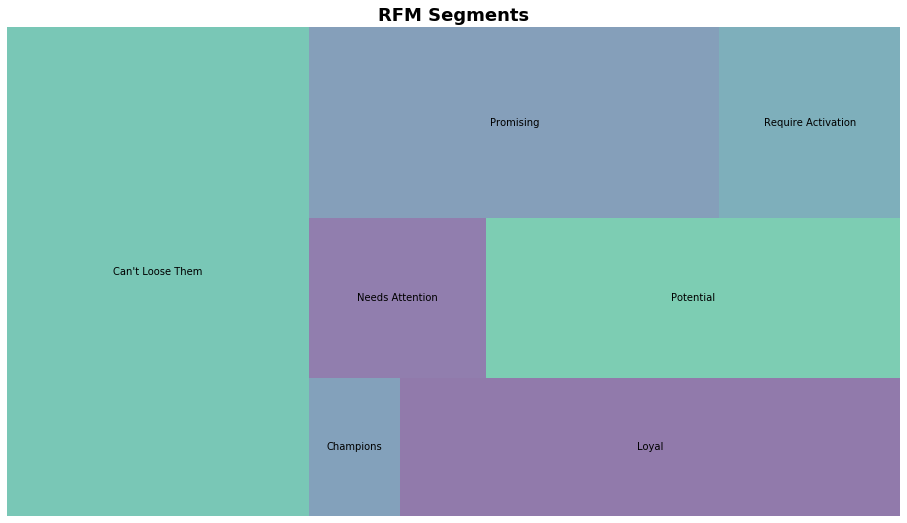

In [123]:
import matplotlib.pyplot as plt
import squarify

rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [110]:
segmented_rfm.head()

,store_number,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,RFMSum,RFM_Level
0,2625,6,4210,740186.62,3,1,1,311,5,Promising
1,2620,4,3422,307584.27,2,1,2,212,5,Promising
2,2561,5,4019,528008.79,3,1,1,311,5,Promising
3,2508,6,2894,350803.17,3,2,2,322,7,Loyal
4,2564,0,1572,195617.57,1,3,3,133,7,Loyal


In [111]:
a = segmented_rfm.RFM_Level.value_counts().tolist()
b = segmented_rfm.RFM_Level.value_counts().keys().tolist()

In [124]:
import plotly.graph_objects as go
import plotly as plotly
colors = ['lightslategray',] * 8
colors[3] = 'crimson'
colors[1] = 'crimson'

fig = go.Figure([go.Bar(x=b, y=a, marker_color=colors)])

fig.update_layout(
    title="Distribution of stores of Hy-Vee based on their performance",
    xaxis_title="Store Segment",
    yaxis_title="Percentage of stores",
)

plotly.offline.iplot(fig, filename='filename.png')

In [114]:
raw=[45,25,22,21,11,9,4]
norm = [float(i)/sum(raw) for i in raw]

In [115]:
norm

[0.3284671532846715,
 0.18248175182481752,
 0.16058394160583941,
 0.15328467153284672,
 0.08029197080291971,
 0.06569343065693431,
 0.029197080291970802]

In [120]:
a = [int(i) for i in multiplied_list]
a

[32, 18, 16, 15, 8, 6, 2]

In [118]:
multiplied_list = [element * 100 for element in norm]